# Wykrywanie Zaburze≈Ñ Sygna≈Çu EKG

![ECG_anomaly_detection_intro.png](https://live.staticflickr.com/65535/54253200317_77c251c48c_o.png)

*Obraz wygenerowany przy u≈ºyciu modelu DALL-E.*

## Wstƒôp

Rozw√≥j sztucznej inteligencji otwiera nowe mo≈ºliwo≈õci w diagnostyce medycznej, zw≈Çaszcza w analizie z≈Ço≈ºonych danych, takich jak [sygna≈Çy elektrokardiograficzne (EKG)](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial). EKG to jedno z najczƒô≈õciej stosowanych narzƒôdzi diagnostycznych w medycynie, umo≈ºliwiajƒÖce ocenƒô i wykrywanie nieprawid≈Çowo≈õci pracy serca.

Tradycyjnie sygna≈Ç EKG powstaje z dwunastu odprowadze≈Ñ, jednak w tym zadaniu skupimy siƒô na sygnale jednoodprowadzeniowym, czyli dysponujemy
jednƒÖ zmiennƒÖ reprezentujƒÖcƒÖ napiƒôcie elektryczne generowane przez serce w czasie. Dane te sƒÖ rejestrowane w postaci krzywej zale≈ºnej od czasu, czyli mo≈ºna tutaj m√≥wiƒá o szeregu czasowym. Z sygna≈Çu EKG mo≈ºna wydzieliƒá charakterystyczne fragmenty, czyli **za≈Çamki** (ang. waves) P, Q, R, S, T oraz **odstƒôpy** pomiƒôdzy dwoma zdarzeniami w EKG (ang. intervals), spo≈õr√≥d kt√≥rych istotnƒÖ rolƒô odgrywa odstƒôp R-R (czas miƒôdzy wystƒÖpieniem dw√≥ch kolejnych za≈Çamk√≥w R). Opr√≥cz tego m√≥wimy o **odcinkach** (ang. segments), czyli d≈Çugo≈õci miƒôdzy dwoma okre≈õlonymi za≈Çamkami w EKG, pomiƒôdzy kt√≥rymi powinna wystƒôpowaƒá bazowa amplituda sygna≈Çu. Z kolei **zesp√≥≈Ç** (ang. complex) stanowi kilka zgrupowanych za≈Çamk√≥w. G≈Ç√≥wnie wyr√≥zniamy tutaj zesp√≥≈Ç QRS. Schematyczny rysunek EKG wraz z podpisanymi fragmentami, jest prezentowany poni≈ºej.

![ECG.png](https://live.staticflickr.com/65535/54254099351_213d47784d_o.png)

W EKG pochodzƒÖcym od zdrowej osoby mo≈ºna zauwa≈ºyƒá sekwencjƒô PQRST. Na poczƒÖtku wyr√≥≈ºniamy za≈Çamek P, kt√≥ra reprezentuje skurcz przedsionk√≥w i jest ma≈Çym pionowym wychyleniem przed zespo≈Çem QRS. Nastƒôpnie, zesp√≥≈Ç QRS wskazuje na skurcz kom√≥r i tworzony jest przez trzy wygiƒôcia: za≈Çamek Q, za≈Çamek R oraz za≈Çamek S. Dalej mo≈ºna zauwa≈ºyƒá odcinek ST, czyli p≈Çaski odcinek miƒôdzy zespo≈Çem QRS a za≈Çamkiem T, kt√≥ry odpowiada wczesnej fazie repolaryzacji kom√≥r. Finalnie, za≈Çamek T, kt√≥ry jest zaokrƒÖglonym, pionowym wychyleniem, dotyczy repolaryzacji kom√≥r i ich powrotu do wyj≈õciowego stanu.  Sekwencja PQRST przypomina sinusoidƒô, kt√≥rej maksimum jest osiƒÖgane dla za≈Çamka R. W przypadku zaburze≈Ñ pracy serca, EKG mo≈ºe wykazywaƒá r√≥≈ºne anomalie, takie jak dodatkowe minima lub maksima, czy te≈º znacznie zwiƒôkszone odchylenie standardowe podczas ca≈Çego pomiaru. Charakterystyka tych anomalii zale≈ºy od rodzaju i przyczyny zaburzenia.

W poni≈ºszym zadaniu musisz zmierzyƒá siƒô z pr√≥bkami zawierajƒÖcymi pojedyncze sekwencje PQRST oraz ich okolice. Wiƒôkszo≈õƒá pr√≥bek bƒôdzie odpowiada≈Ça danym bez anomalii, kt√≥rych przyk≈Çad zaprezentowany jest na poni≈ºszym obrazku:

![normal_example.png](https://live.staticflickr.com/65535/54253200322_f0173af129_o.png)

Wystƒôpowaƒá bƒôdƒÖ te≈º pomiary odpowiadajƒÖce czterem rodzajom zaburze≈Ñ:  **AFib**, czyli migotaniu przedsionk√≥w, **PAC**, czyli przedwczesnemu pobudzeniu przedsionkowemu, **PVC**, czyli przedwczesnym skurczom komorowym oraz **STEMI**, czyli zawa≈Çowi miƒô≈õnia sercowego z uniesieniem odcinka ST.

**UWAGA**: Poni≈ºsze dane sƒÖ danymi syntetycznymi i sƒÖ tylko pewnym przybli≈ºeniem rzeczywistych danych EKG!

EKG jest typowym przyk≈Çadem szeregu czasowego, kt√≥ry mo≈ºna analizowaƒá za pomocƒÖ dedykowanych metod uczenia maszynowego, w tym sieci neuronowych, np. sieci rekurencyjnych. Jednak nie zawsze wykorzystanie sieci neuronowych jest konieczne, a nawet wskazane. W przypadku niekt√≥rych problem√≥w satysfakcjonujƒÖce wyniki mo≈ºna uzyskaƒá za pomocƒÖ prostszych metod, gdzie kluczowe jest odpowiednie przygotowanie danych. Ich umiejƒôtna analiza pozwala na selekcjƒô kliku metacech - cech zwiƒô≈∫le opisujƒÖcych pr√≥bki ze zbioru danych, np. ≈õredniej, minimum, maksimum, odchylenia standardowego, itp. MogƒÖ byƒá one wykorzystane do klasyfikacji zamiast oryginalnych cech. Dziƒôki temu korzystamy z niskowymiarowych danych wej≈õciowych, przyk≈Çadowo redukujemy 150-wymiarowy wektor zawierajƒÖcy informacje z oryginalnych krok√≥w czasowych do wektora 4-wymiarowego zawierajƒÖcego specjalnie przygotowane cechy.

Przyk≈Çadem zastosowania niewielkiej liczby metacech sƒÖ modele uczenia maszynowego, kt√≥re majƒÖ dzia≈Çaƒá na urzƒÖdzeniach wbudowanych lub ma≈Çych urzƒÖdzeniach mobilnych, gdzie kluczowe sƒÖ takie ograniczenia, jak wym√≥g niskiego poboru energii, ma≈Ça ilo≈õƒá dostƒôpnej pamiƒôci operacyjnej czy ograniczona moc obliczeniowa. W takich przypadkach wymagane jest zastosowanie prostszych modeli, kt√≥re sƒÖ w stanie zapewniƒá odpowiedniƒÖ dok≈Çadno≈õƒá klasyfikacji przy jednoczesnym zachowaniu wymaganych ogranicze≈Ñ.

## Zadanie

Przygotuj rozwiƒÖzanie (wraz z wytrenowaniem modelu lasu losowego), kt√≥re spe≈Çni wymagania naszego urzƒÖdzenia wbudowanego. Przeanalizuj dane i przygotuj zestaw **4 metacech**, kt√≥re dadzƒÖ najlepszƒÖ zr√≥wnowa≈ºonƒÖ dok≈Çadno≈õƒá (ang. *balanced accuracy*) dla problemu klasyfikacji sygna≈Ç√≥w EKG. Zbi√≥r danych sk≈Çada siƒô ze zbioru treningowego oraz walidacyjnego (wraz z etykietami), na kt√≥rym mo≈ºesz weryfikowaƒá swoje podej≈õcie. Twoje rozwiƒÖzanie bƒôdzie sprawdzane na osobnym (tajnym) zbiorze testowym, w kt√≥rym liczba obserwacji bƒôdzie siƒô r√≥≈ºniƒá od liczby obserwacji w zbiorach treningowym i walidacyjnym. Ka≈ºda pr√≥bka jest opisana 150 warto≈õciami odpowiadajƒÖcymi kolejnym krokom czasowym oraz jest przypisana do jednej z piƒôciu nastƒôpujƒÖcych klas:

| ID klasy  | Nazwa klasy   | Opis  | Pr√≥bki w zbiorze treningowym | Pr√≥bki w zbiorze walidacyjnym |
| ------    | ------        | ----  | ---------------------------- | ----------------------------- |
| 0         | normal        | brak anomalii | 1400 | 819 |
| 1         | afib          | Atrial Fibrillation (migotanie przedsionk√≥w)| 150 | 142 |
| 2         | pac           | Premature Atrial Contractions (przedwczesne pobudzenie przedsionkowe)| 150 | 191 |
| 3         | pvc           | Premature Ventricular Complex (przedwczesne skurcze komorowe)| 150 | 197 |
| 4         | st_elevation  | ST-elevation myocardial infarction (zawa≈Ç miƒô≈õnia sercowego z uniesieniem odcinka ST) | 150 | 151 |

Nowe cechy powinny zawieraƒá kluczowe informacje diagnostyczne r√≥znicujƒÖce powy≈ºsze klasy, kt√≥re pozwolƒÖ na skutecznƒÖ klasyfikacjƒô wymienionych anomalii.

Klasyfikatorem dla tego zadania jest [las losowy](https://pl.wikipedia.org/wiki/Las_losowy) z liczbƒÖ drzew decyzyjnych nie wiƒôkszƒÖ ni≈º 10 oraz maksymalnƒÖ g≈Çƒôboko≈õciƒÖ 10. **RozwiƒÖzania niespe≈ÇniajƒÖce tych warunk√≥w bƒôdƒÖ dyskwalifikowane!** W przypadku innych parametr√≥w lasu nie ma ogranicze≈Ñ. Dozwolony jest tak≈ºe preprocessing, czyli wstƒôpne przetwarzanie danych wej≈õciowych (np. zastosowanie normalizacji danych).

### Kryterium Oceny

Twoje rozwiƒÖzanie oceniane bƒôdzie na tajnym zbiorze testowym na podstawie [zr√≥wnowa≈ºonej dok≈Çadno≈õci klasyfikacji (balanced accuracy)](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.balanced_accuracy_score.html):

$$\text{score}(balanced\_accuracy) = 
\begin{cases} 
    0 &\quad \text{je≈ºeli }  balanced\_accuracy \leq 75 \% \\
    100 &\quad \text{je≈ºeli }  balanced\_accuracy \geq 98 \% \\
    \dfrac{balanced\_accuracy - 75 \%}{98 \% - 75 \%} &\quad \text{w pozosta≈Çych przypadkach}
\end{cases}$$

Oznacza to, ≈ºe wszystkie rozwiƒÖzania, kt√≥re na zbiorze testowym uzyskajƒÖ do $75\%$ zr√≥wnowa≈ºonej dok≈Çadno≈õci klasyfikacji, otrzymajƒÖ $0$ punkt√≥w, za≈õ co najmniej $98\%$ zr√≥wnowa≈ºonej dok≈Çadno≈õci klasyfikacji, uzyskajƒÖ maksymalnƒÖ liczbƒô punkt√≥w za zadanie. Wszystkie za≈õ¬†warto≈õci z przedzia≈Çu $75-98\%$ zostanƒÖ zamienione na liczbƒô punkt√≥w (miƒôdzy $0$ a $100$) zgodnie z powy≈ºszym wzorem.

*Wskaz√≥wka*: Twoim wyznacznikiem jako≈õci proponowanego rozwiƒÖzania powinien byƒá wynik na zbiorze walidacyjnym.

W zagadnieniach dot. wykrywania chor√≥b do≈õƒá czƒôsto mamy do czynienia z niezr√≥wnowa≈ºonym (niezbalansowanym) zbiorem danych. Chodzi o to, ≈ºe zazwyczaj w≈õr√≥d danych dominujƒÖ przyk≈Çady *normalne*, odpowiadajƒÖce osobom zdrowym, a pr√≥bki reprezentujƒÖce osoby chore zwykle nale≈ºƒÖ do mniejszo≈õci. Wyobra≈∫my sobie sytuacjƒô, w kt√≥rej na 100 pr√≥bek jedynie 10 dotyczy os√≥b chorych, a pozosta≈Çe 90 zdrowych. W√≥wczas model, kt√≥ry ka≈ºdej pr√≥bce przyporzƒÖdkowywa≈Çby klasƒô *zdrowy*, osiƒÖgnƒÖ≈Çby 90% dok≈Çadno≈õci klasyfikacji, lecz jedynie 50% zr√≥wnowa≈ºonej dok≈Çadno≈õci klasyfikacji! Oczywi≈õcie taki model by≈Çby bezu≈ºyteczny. W takich przypadkach potrzebujemy miary, kt√≥ra lepiej odpowiada potrzebom wynikajƒÖcym z postawionego problemu i informuje o skuteczno≈õci modelu w spos√≥b u≈ºyteczny z punktu widzenia jego p√≥≈∫niejszego u≈ºytkownika.

W tym zadaniu musisz siƒô wiƒôc skupiƒá siƒô na tym, by ka≈ºda z klas by≈Ça przyporzƒÖdkowywana prawid≈Çowo.

## Ograniczenia
- Twoje rozwiazanie bƒôdzie testowane na Platformie Konkursowej bez dostƒôpu do internetu oraz w ≈õrodowisku bez GPU.
- Ewaluacja Twojego finalnego rozwiƒÖzania na Platformie Konkursowej nie mo≈ºe trwaƒá d≈Çu≈ºej ni≈º 1 minutƒô bez GPU.
- Podczas przygotowania danych nale≈ºy pamiƒôtaƒá o tym, ≈ºe:
    - zakazane jest korzystanie z innych ni≈º lasy losowe metod uczenia maszynowego, zar√≥wno nadzorowanego jak i nienadzorowanego (np. autokodery, wielowarstwowe perceptrony i inne sieci neuronowe, maszyny wektor√≥w no≈õnych (SVM), i inne), dozwolone sƒÖ jednak metody redukcji wymiarowo≈õci, w stylu analizy sk≈Çadowych g≈Ç√≥wnych (PCA);
    - przy konstrukcji metacech mo≈ºna korzystaƒá wy≈ÇƒÖcznie z funkcji dostƒôpnych standardowo w Pythonie (`v3.11`), a tak≈ºe Numpy (`v2.0.2`) oraz Scipy (`v1.14.1`);
    - mo≈ºna wyznaczyƒá maksymalnie 4 metacechy,
- Do klasyfikacji mo≈ºna wykorzystaƒá wy≈ÇƒÖcznie [las losowy (RandomForestClassifier) z biblioteki scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (`v1.5.2`):
    - z≈Ço≈ºony z maksymalnie 10 drzew decyzyjnych (`n_estimators` $\leq 10$);
    - ka≈ºde drzewo ma mieƒá maksymalnƒÖ g≈Çƒôboko≈õƒá r√≥wnƒÖ 10 (`max_depth` $\leq 10$);
    - pozosta≈Çe hiperparametry mo≈ºna modyfikowaƒá bez ogranicze≈Ñ;

## Pliki Zg≈Çoszeniowe
Ten notebook uzupe≈Çniony o Twoje rozwiƒÖzanie (patrz klasa `YourSolution`), w kt√≥rym przygotujesz zestaw 4 metacech opisujƒÖcych zbi√≥r danych oraz zestaw hiperparametr√≥w lasu losowego.

## Ewaluacja
Pamiƒôtaj, ≈ºe podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie mo≈ºesz zdobyƒá pomiƒôdzy 0 a 100 punkt√≥w. Liczba punkt√≥w, kt√≥rƒÖ zdobƒôdziesz, bƒôdzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wy≈ºej wspomnianego wzoru, zaokrƒÖglona do liczby ca≈Çkowitej. Je≈õli Twoje rozwiƒÖzanie nie bƒôdzie spe≈Çnia≈Ço powy≈ºszych kryteri√≥w lub nie bƒôdzie wykonywaƒá siƒô prawid≈Çowo, otrzymasz za zadanie 0 punkt√≥w.

---

## Informacje Uzupe≈ÇniajƒÖce

### Zr√≥wnowa≈ºona Dok≈Çadno≈õƒá Klasyfikacji

Niech $C$ bƒôdzie liczbƒÖ klas, a $N_j$ odpowiada ilo≈õci pr√≥bek nale≈ºƒÖcych do $j$-tej klasy, gdzie $j \in \lbrace 1, ..., C \rbrace$. Ponadto, niech $\hat{y}_{i,j}$ bƒôdzie przewidywanƒÖ przez model klasƒÖ dla $j$-tej pr√≥bki nale≈ºƒÖcej w rzeczywisto≈õci do $i$-tej klasy. W√≥wczas zr√≥wnowa≈ºonƒÖ (zbalansowanƒÖ) dok≈Çadno≈õƒá klasyfikacji mo≈ºemy wyliczyƒá nastƒôpujƒÖco:

$$
balanced\_accuracy = \dfrac{1}{C} \sum\limits_{i=1}^{C} \sum\limits_{j=1}^{|N_c|} \dfrac{1}{|N_c|} \cdot \mathbf{1} \left( \hat{y}_{i, j} = i \right),
$$

gdzie $\mathbf{1} \left( \hat{y}_{i, j} = i \right)$ jest funkcjƒÖ indykatorowƒÖ, kt√≥ra przyjmuje warto≈õƒá 1, je≈õli $\hat{y}_{i, j} = i$, czyli w sytuacji, w kt√≥rej klasa przewidywana dla $j$-tej pr√≥bki jest taka sama jak rzeczywista klasa tej pr√≥bki oraz 0 w przeciwnym przypadku. Suma zewnƒôtrzna przebiega po kolejnych klasach, a wewnƒôtrzna po kolejnych pr√≥bkach nale≈ºƒÖcych do danej klasy.

**Przyk≈Çad**: Niech
$$\mathbf{y} = [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3]$$

bƒôdzie wektorem reprezentujƒÖcym rzeczywiste klasy dla kolejnych pr√≥bek, a

$$\mathbf{\hat{y}} = [0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3]$$

wektorem reprezentujƒÖcym predykcje modelu dla tych≈ºe pr√≥bek. Mamy wiƒôc do czynienia z czterema klasami, gdzie model mia≈Ç problem z klasƒÖ o numerze $1$. Wszystkie pozosta≈Çe przyk≈Çady zosta≈Çy przypisane bezb≈Çƒôdnie. ≈ÅƒÖcznie 10 na 12 pr√≥bek zosta≈Ço sklasyfikowanych prawid≈Çowo, co oznacza, ≈ºe gdyby≈õmy mieli mierzyƒá "zwyk≈ÇƒÖ" dok≈Çadno≈õƒá klasyfikacji, otrzymaliby≈õmy ok. $83.3\%$ . Jednak gdy przyjrzymy siƒô zbalansowanej dok≈Çadno≈õci klasyfikacji, otrzymamy wynik $75\%$.

Za≈Ç√≥≈ºmy teraz, ≈ºe

$$\mathbf{\hat{y}} = [0, 0, 0, 1, 0, 2, 2, 2, 2, 3, 3, 3]$$

czyli model klasyfikuje poprawnie $50\%$ pr√≥bek z klasy 1 oraz $100\%$ pr√≥bek z pozosta≈Çych klas. "Zwyk≈Ça" dok≈Çadno≈õƒá klasyfikacji wynosi tutaj niespe≈Çna $92\%$, podczas gdy zbalansowana dok≈Çadno≈õƒá klasyfikacji wynosi $87.5\%$.

### Anomalie WystƒôpujƒÖce w Rozwa≈ºanym Zbiorze Danych

#### AFib
**Atrial Fibrillation (AFib)**, czyli migotanie przedsionk√≥w, wystƒôpuje wtedy, gdy potencja≈Çy czynno≈õciowe wyzwalajƒÖ siƒô bardzo szybko i chaotycznie, w zwiƒÖzku z tym rytm serca jest nieregularny. W tym zaburzeniu za≈Çamki P mogƒÖ nie byƒá widoczne w EKG, a zesp√≥≈Ç QRS staje siƒô nieregularny.

![AFIB_example.png](https://live.staticflickr.com/65535/54253219357_78c51f06ff_o.png)

#### PAC
**Premature Atrial Contractions (PACs)**, czyli przedwczesne pobudzenie przedsionkowe, zwiƒÖzane jest z nieprawid≈Çowym za≈Çamkiem P, po kt√≥rym nastƒôpuje prawid≈Çowy zesp√≥≈Ç QRS. *Uwaga!* W pr√≥bkach z zadania wystƒôpujƒÖ przyk≈Çady, w kt√≥rych w ramach jednej pr√≥bki ze zbioru danych widoczny jest jedynie przedwczesny za≈Çamek P.

![PAC_example.png](https://live.staticflickr.com/65535/54254324138_df77fdd62a_o.png)

#### PVC
**Premature Ventricular Contractions (PVCs)**, czyli przedwczesne skurcze komorowe, sƒÖ dodatkowymi uderzeniami serca, kt√≥re rozpoczynajƒÖ siƒô w jednej z dw√≥ch kom√≥r serca i zak≈Ç√≥cajƒÖ jego regularny rytm. SƒÖ jednym z powszechnych rodzaj√≥w arytmii. Skurcze te zachodzƒÖ wcze≈õniej ni≈º by≈Çoby to oczekiwane na podstawie poprzednich odstƒôp√≥w R-R.

![PVC_example.png](https://live.staticflickr.com/65535/54254518540_12ba23c53f_o.png)

#### STEMI
**ST-elevation myocardial infarction (STEMI)**, czyli zawa≈Ç miƒô≈õnia sercowego z uniesieniem odcinka ST, powoduje zablokowanie przep≈Çywu krwi do miƒô≈õnia sercowego i jego obumarcie. Segment ST wystƒôpuje tu≈º po zespole QRS. W normalnej sytuacji nie ma tam ≈ºadnej aktywno≈õci elektrycznej, przez co jest on p≈Çaski. Je≈õli za≈õ wystƒôpuje uniesienie odcinka ST, oznacza to blokadƒô jednej z g≈Ç√≥wnych tƒôtnic doprowadzajƒÖcych krew do serca.

![STEMI_example.png](https://live.staticflickr.com/65535/54254099356_422c23144e_o.png)

---

**≈πr√≥d≈Ça opisu medycznego dot. EKG**: [1](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-ventricular-contractions-review), [2](https://www.mayoclinic.org/diseases-conditions/premature-ventricular-contractions/symptoms-causes/syc-20376757), [3](https://litfl.com/premature-atrial-complex-pac/), [4](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-atrial-contractions-review), [5](https://www.mayoclinic.org/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624), [6](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/atrial-fibrillation-review), [7](https://my.clevelandclinic.org/health/diseases/22068-stemi-heart-attack), obraz za≈Çamk√≥w PQRST na podstawie [8](https://www.sciencedirect.com/science/article/pii/S0213911121002466).

# Kod Startowy

W tej sekcji inicjalizujemy ≈õrodowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod u≈Çatwi Tobie efektywne operowanie na danych i budowanie w≈Ça≈õciwego rozwiƒÖzania.

In [166]:
######################### NIE ZMIENIAJ TEJ KOM√ìRKI PODCZAS WYSY≈ÅANIA ##########################

# W czasie sprawdzania Twojego rozwiƒÖzania, warto≈õƒá flagi FINAL_EVALUATION_MODE zostanie zmieniona na True
FINAL_EVALUATION_MODE = False

In [167]:
######################### NIE ZMIENIAJ TEJ KOM√ìRKI PODCZAS WYSY≈ÅANIA ##########################
import cloudpickle

import os
import random
from abc import ABC, abstractmethod

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [168]:
######################### NIE ZMIENIAJ TEJ KOM√ìRKI PODCZAS WYSY≈ÅANIA ##########################

# Ustawienie ziarna generatora liczb pseudolosowych w celu zapewnienia deterministyczno≈õci wynik√≥w.
random.seed(42)
np.random.seed(42)

## ≈Åadowanie Danych
Za pomocƒÖ poni≈ºszego kodu wczytujemy dane.

In [169]:
######################### NIE ZMIENIAJ TEJ KOM√ìRKI PODCZAS WYSY≈ÅANIA ##########################

train_val_filename = "train_validation_sets.npz"
if not os.path.exists(train_val_filename):
    import gdown
    url = "https://drive.google.com/file/d/1pCqgbsKBQP1UnH2kMmBKRS1AuvmSl9jx/view?usp=sharing"
    gdown.download(url, train_val_filename, quiet=True, fuzzy=True)

train_valid_bundle = np.load("train_validation_sets.npz", allow_pickle=True)
x_train = train_valid_bundle["X_train"]
y_train = train_valid_bundle["y_train"]
y_train_str = train_valid_bundle["anomaly_train"]

x_valid = train_valid_bundle["X_validation"]
y_valid = train_valid_bundle["y_validation"]
y_valid_str = train_valid_bundle["anomaly_validation"]

## Publiczny Interfejs RozwiƒÖzania

Tylko tego wymagamy od Twojej klasy. W Twoim rozwiƒÖzaniu mo≈ºesz modyfikowaƒá swojƒÖ klasƒô do woli dodajƒÖc atrybuty oraz nowe metody obliczajƒÖce metacechy - cokolwiek co bƒôdzie Ci potrzebne do rozwiƒÖzania zadania.

In [170]:
######################### NIE ZMIENIAJ TEJ KOM√ìRKI PODCZAS WYSY≈ÅANIA ##########################

class ISolution(ABC):
    random_forest: RandomForestClassifier | None = None

    @classmethod
    def create_with_training(cls) -> "ISolution":
        """Metoda s≈Çu≈ºƒÖca do stworzenia rozwiƒÖzania z wytrenowanym lasem losowym."""
        solution = cls()

        hyperparameters = cls.get_rf_hyperparameters()
        hyperparameters = cls.validate_hyperparameters(hyperparameters)
        solution.random_forest = RandomForestClassifier(**hyperparameters)

        meta_features = solution.compute_meta_features(x_train)
        solution.random_forest.fit(meta_features, y_train)
        return solution

    @staticmethod
    def validate_hyperparameters(hyperparameters: dict[str, int | float | str]) -> dict[str, int | float | str]:
        """
        Funkcja ta sprawdza, czy hiperparametry lasu losowego sƒÖ zgodne z wymaganiami zadania. Je≈õli nie, to poprawia je na
        domy≈õlne warto≈õci.
        """
        hyperparameters["n_estimators"] = min(hyperparameters.get("n_estimators", 10), 10)
        hyperparameters["max_depth"] = min(hyperparameters.get("max_depth", 10), 10)
        hyperparameters["random_state"] = 42
        return hyperparameters

    @abstractmethod
    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Funkcja ta powinna dla ka≈ºdego przyk≈Çadu ze zbioru $x$ opisanego 150 cechami zwr√≥ciƒá wektor 4 cech, kt√≥ry bƒôdzie
        reprezentowa≈Ç ten przyk≈Çad. Funkcja ta powinna przekszta≈Çcaƒá wej≈õciowƒÖ tablicƒô o rozmiarze (n, 150) na tablicƒô o
        rozmiarze (n, 4).
        """

        pass

    @staticmethod
    @abstractmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        """
        Funkcja ta powinna zwracaƒá s≈Çownik z hiperparametrami lasu losowego. Pamiƒôtaj o ograniczeniach na liczbƒô drzew i ich
        g≈Çƒôboko≈õƒá!
        """

        pass


## Kod z Kryterium OceniajƒÖcym
Kod, zbli≈ºony do poni≈ºszego, bƒôdzie u≈ºywany do oceny rozwiƒÖzania na zbiorze testowym.

In [171]:
######################### NIE ZMIENIAJ TEJ KOM√ìRKI PODCZAS WYSY≈ÅANIA ##########################

def balanced_accuracy_to_score(balanced_accuracy: float) -> float:
    return min(max((balanced_accuracy - 75.) * (100. / (98. - 75.)), 0.), 100.)


def score_solution(solution: ISolution) -> float:
    x, y = x_valid, y_valid
    meta_features = solution.compute_meta_features(x)
    y_hat = solution.random_forest.predict(meta_features)
    balanced_accuracy = 100. * balanced_accuracy_score(y, y_hat)

    assert meta_features.shape[-1] <= 4
    assert solution.random_forest.n_estimators <= 10
    assert solution.random_forest.max_depth <= 10

    if not FINAL_EVALUATION_MODE:
        print("Ocena dzia≈Çania modelu: \n")
        print(f"Zbalansowana dok≈Çadno≈õƒá klasyfikacji: {balanced_accuracy: .4f}")
    return int(round(balanced_accuracy_to_score(balanced_accuracy)))

In [172]:
# import numpy as np
# from scipy.signal import find_peaks, peak_widths
# from scipy.stats import variation, entropy, skew
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Temporary class for dev ‚Äî skip assert limits
# class DebugSolution:
#     def compute_meta_features(self, x):
#         n = x.shape[0]
#         features = np.zeros((n, 10))  # We compute 10 features here
#         
#         for i in range(n):
#             sig = x[i]
#             norm_sig = (sig - sig.min()) / (sig.max() - sig.min() + 1e-8)
#             peaks, _ = find_peaks(sig, height=0.4, distance=20)
#             rr = np.diff(peaks)
# 
#             # Original + new features
#             features[i, 0] = variation(rr) if len(rr) > 1 else 0  # RR CV
#             features[i, 1] = entropy(norm_sig + 1e-8)              # Entropy
#             features[i, 2] = np.abs(skew(sig))                    # Skewness
#             features[i, 3] = np.std(rr) if len(rr) > 1 else 0     # RR Std
#             features[i, 4] = len(peaks)                           # Peak count
#             features[i, 5] = np.max(sig) - np.min(sig)            # Peak-to-peak amp
#             features[i, 6] = np.median(np.diff(sig))              # Median diff
#             features[i, 7] = np.percentile(sig, 90) - np.percentile(sig, 10)  # Spread
#             features[i, 8] = np.mean(np.abs(np.diff(sig)))        # Mean abs diff
#             features[i, 9] = np.max(sig[:50]) - np.median(sig[:50])  # P-wave bump
# 
#         return features
# 
# # === Load your dev data ===
# x_train, y_train = x_train, y_train
# x_valid, y_valid = x_valid, y_valid
# 
# # === Compute features ===
# model = DebugSolution()
# X_train_full = model.compute_meta_features(x_train)
# X_valid_full = model.compute_meta_features(x_valid)
# 
# # === Feature selection ===
# selector = SelectKBest(f_classif, k=4)
# X_train_sel = selector.fit_transform(X_train_full, y_train)
# X_valid_sel = selector.transform(X_valid_full)
# 
# top_features = selector.get_support(indices=True)
# print("Selected top feature indices:", top_features)
# 
# # === Train classifier ===
# clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
# clf.fit(X_train_sel, y_train)
# y_pred = clf.predict(X_valid_sel)
# 
# # === Metrics ===
# print("\n=== Classification Report ===")
# print(classification_report(y_valid, y_pred, target_names=["normal", "afib", "pac", "pvc", "st_elevation"]))
# 
# # === Confusion Matrix ===
# cm = confusion_matrix(y_valid, y_pred, normalize='true')
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, cmap="viridis", xticklabels=["normal", "afib", "pac", "pvc", "st_elevation"],
#             yticklabels=["normal", "afib", "pac", "pvc", "st_elevation"])
# plt.title("Normalized Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.tight_layout()
# plt.show()
# 
# # === Feature Importances ===
# plt.figure(figsize=(6, 4))
# plt.bar(range(4), clf.feature_importances_)
# plt.xticks(range(4), [f'F{i}' for i in top_features])
# plt.title("Top 4 Feature Importances")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


## Przyk≈Çadowe RozwiƒÖzanie

Poni≈ºej przedstawiamy uproszczone rozwiƒÖzanie, kt√≥re s≈Çu≈ºy jako przyk≈Çad demonstrujƒÖcy podstawowƒÖ funkcjonalno≈õƒá notatnika. Mo≈ºe ono pos≈Çu≈ºyƒá jako punkt wyj≈õcia do opracowania Twojego rozwiƒÖzania.

In [173]:
import numpy as np
from scipy.signal import find_peaks, peak_widths
from scipy.stats import variation, skew, entropy
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

class ExemplarySolution(ISolution):
    def __init__(self):
        self.selected_indices = None
        self.random_forest = None
        self.feature_names = [
            "RR_var", "Entropy", "Pwave_ratio", "P_early_dist",
            "QRS_width", "QRS_sharp", "ST_elev", "Skew_abs", "Peak_count"
        ]

    def compute_all_features(self, x: np.ndarray) -> np.ndarray:
        n_samples = x.shape[0]
        features = np.zeros((n_samples, 9))

        for i in range(n_samples):
            signal = x[i]
            norm_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal) + 1e-8)

            # R peaks
            peaks, _ = find_peaks(signal, height=0.4, distance=20, prominence=0.2)
            rr_intervals = np.diff(peaks) if len(peaks) >= 2 else np.array([1])

            # === AFib ===
            features[i, 0] = np.log1p(variation(rr_intervals)) if len(rr_intervals) > 1 else 0
            features[i, 1] = entropy(norm_signal + 1e-8)

            # === PAC ===
            p_region = signal[:80]
            p_peaks, p_props = find_peaks(p_region, height=0.2, prominence=0.1, width=5)
            if len(p_peaks) > 0:
                widths = peak_widths(p_region, p_peaks, rel_height=0.5)[0]
                features[i, 2] = np.mean(p_props['prominences']) / (np.mean(widths) + 1e-6)
                features[i, 3] = np.min(np.diff(p_peaks)) if len(p_peaks) > 1 else 0
            else:
                features[i, 2:4] = 0

            # === PVC ===
            qrs_peaks, _ = find_peaks(signal, height=0.5, distance=25, prominence=0.3)
            if len(qrs_peaks) > 0:
                main_peak = qrs_peaks[np.argmax(signal[qrs_peaks])]
                width = peak_widths(signal, [main_peak], rel_height=0.5)[0][0]
                features[i, 4] = width
                features[i, 5] = signal[main_peak] / (width + 1e-6)
            else:
                features[i, 4:6] = 0
                main_peak = np.argmax(signal[50:100]) + 50  # fallback

            # === ST Elevation ===
            qrs_end = main_peak + 15
            st_region = signal[qrs_end:min(len(signal), qrs_end + 20)]
            baseline = np.percentile(signal[:30], 25)
            features[i, 6] = np.percentile(st_region, 90) - baseline

            # === General ===
            features[i, 7] = np.abs(skew(signal))
            features[i, 8] = len(peaks)

        return features

    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        full = self.compute_all_features(x)
        return full[:, self.selected_indices] if self.selected_indices is not None else full

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        return {
            "n_estimators": 10,
            "max_depth": 10,
            "min_samples_split": 3,
            "min_samples_leaf": 2,
            "max_features": 'sqrt',
            "class_weight": {0: 1, 1: 8, 2: 10, 3: 10, 4: 8},
            "random_state": 42,
            "criterion": "entropy",
            "min_impurity_decrease": 0.01,
            "bootstrap": True
        }

    @classmethod
    def create_with_training(cls):
        sol = cls()
        X, y = x_train, y_train
        full_features = sol.compute_all_features(X)

        # Initial training on all features
        rf_full = RandomForestClassifier(**sol.get_rf_hyperparameters())
        rf_full.fit(full_features, y)

        # Select top 4 features (descending importance)
        importances = rf_full.feature_importances_
        top4 = np.argsort(importances)[::-1][:4]
        sol.selected_indices = top4

        # Retrain on top 4 features
        sol.random_forest = RandomForestClassifier(**sol.get_rf_hyperparameters())
        sol.random_forest.fit(full_features[:, top4], y)

        # Display feature importances
        print("Selected features:", [sol.feature_names[i] for i in top4])
        plt.figure()
        plt.bar([sol.feature_names[i] for i in top4], importances[top4])
        plt.title("Top 4 Feature Importances")
        plt.tight_layout()
        plt.show()

        return sol


In [174]:
def plot_feature_distributions(meta_features: np.ndarray, labels: np.ndarray, class_names=None):
    n_features = meta_features.shape[1]
    n_classes = len(np.unique(labels))
    class_names = class_names or [f'Class {i}' for i in range(n_classes)]

    for i in range(n_features):
        plt.figure(figsize=(8, 4))
        for cls in range(n_classes):
            cls_mask = labels == cls
            plt.hist(meta_features[cls_mask, i], bins=30, alpha=0.6, label=class_names[cls], density=True)
        plt.title(f"Feature {i} Distribution")
        plt.xlabel(f"Feature {i}")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


ERROR: Invalid requirement: 'classification_report,'
Selected features: ['ST_elev', 'Peak_count', 'Pwave_ratio', 'QRS_sharp']


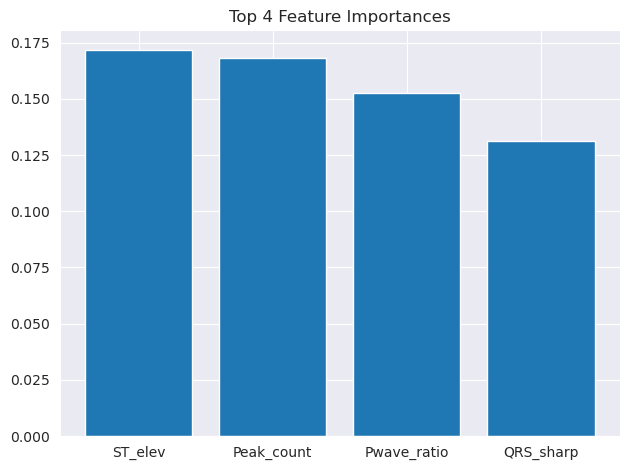

Ocena dzia≈Çania modelu: 

Zbalansowana dok≈Çadno≈õƒá klasyfikacji:  74.7856
Ocena: 0 pkt

=== Classification Report ===
              precision    recall  f1-score   support

      normal       0.88      0.85      0.86       819
        afib       0.88      0.86      0.87       142
         pac       0.56      0.65      0.60       191
         pvc       0.58      0.59      0.58       197
st_elevation       0.81      0.79      0.80       151

    accuracy                           0.78      1500
   macro avg       0.74      0.75      0.74      1500
weighted avg       0.79      0.78      0.79      1500

=== Confusion Matrix ===


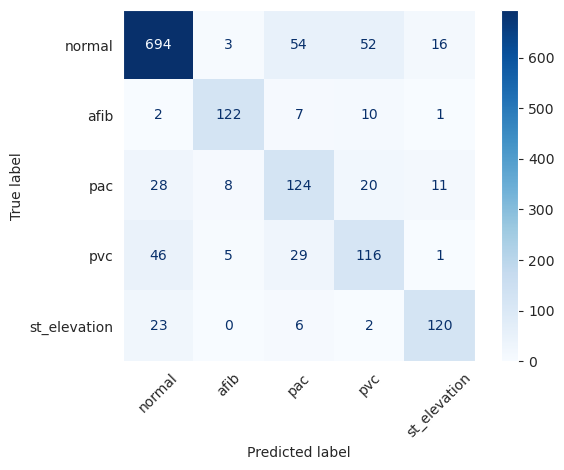

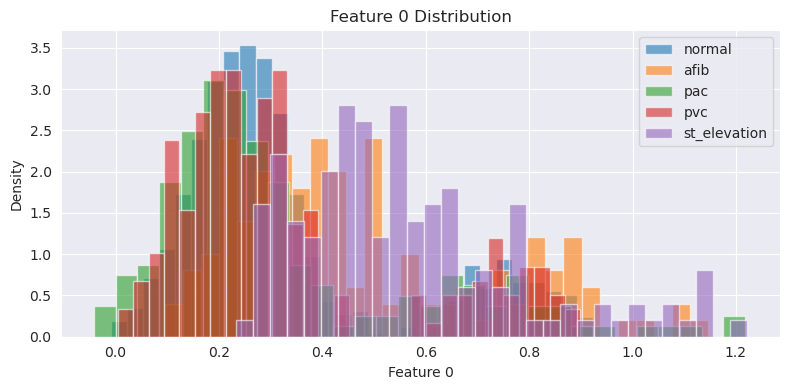

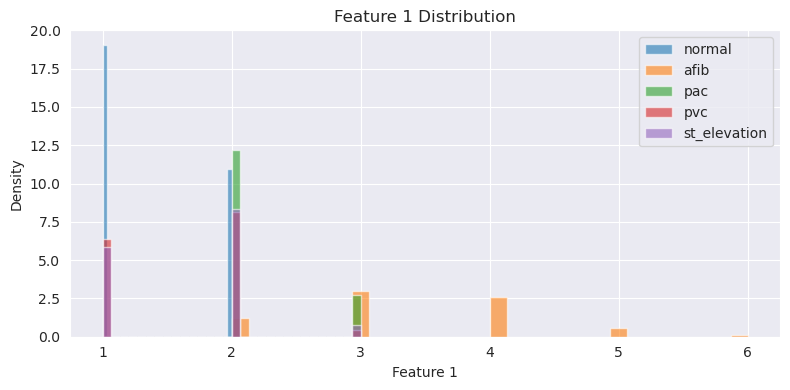

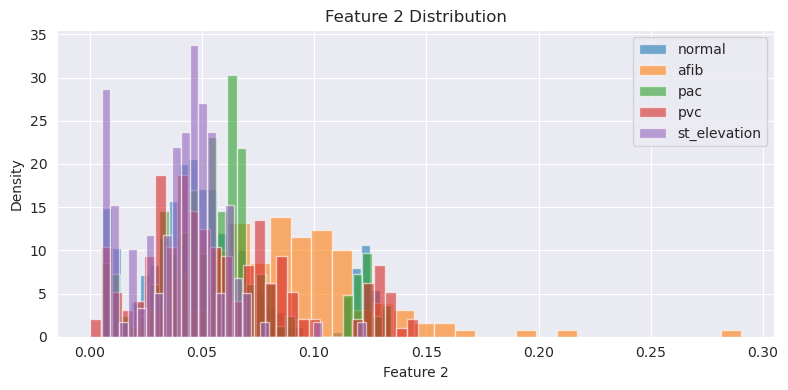

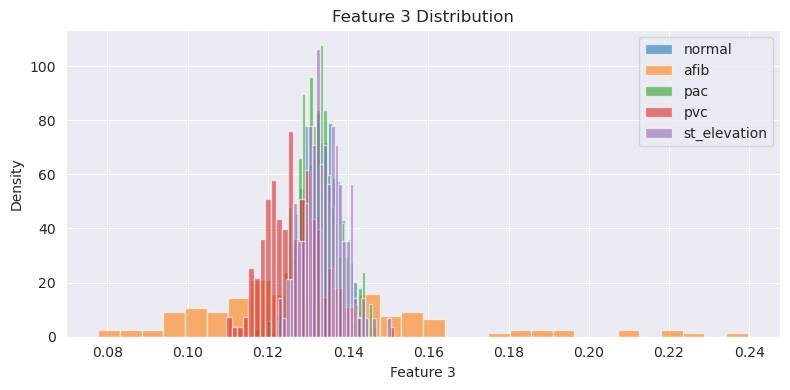

Selected features: ['ST_elev', 'Peak_count', 'Pwave_ratio', 'QRS_sharp']


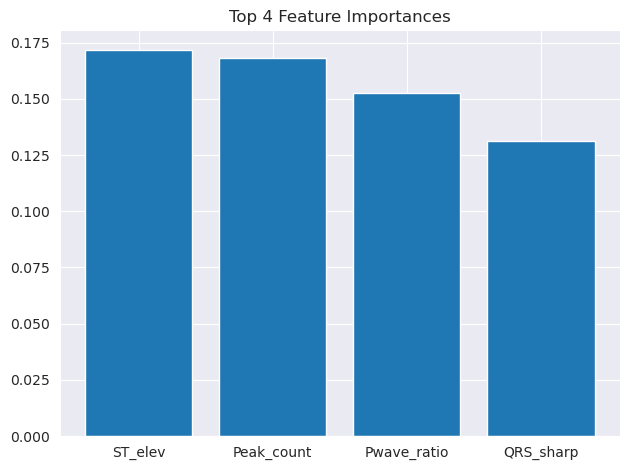

Ocena dzia≈Çania modelu: 

Zbalansowana dok≈Çadno≈õƒá klasyfikacji:  74.7856

üéØ Ocena: 0.0000 pkt

=== üìä Classification Report ===
              precision    recall  f1-score   support

      normal       0.88      0.85      0.86       819
        afib       0.88      0.86      0.87       142
         pac       0.56      0.65      0.60       191
         pvc       0.58      0.59      0.58       197
st_elevation       0.81      0.79      0.80       151

    accuracy                           0.78      1500
   macro avg       0.74      0.75      0.74      1500
weighted avg       0.79      0.78      0.79      1500



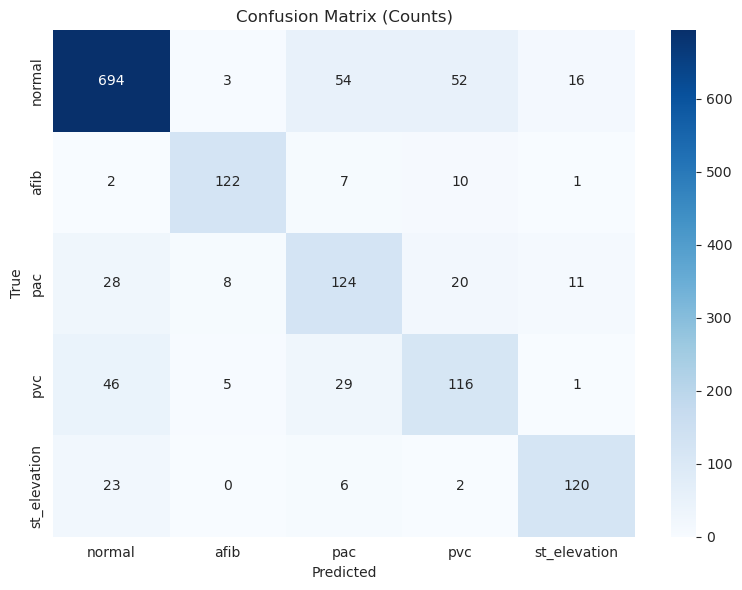

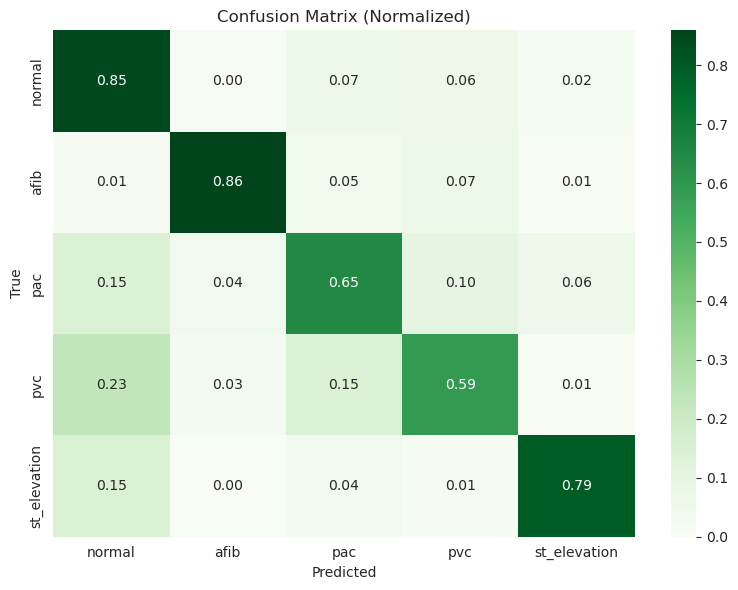


=== üßÆ Per-Class Accuracy and F1 Score ===
      normal: Accuracy = 0.85 | F1 = 0.86
        afib: Accuracy = 0.98 | F1 = 0.87
         pac: Accuracy = 0.89 | F1 = 0.60
         pvc: Accuracy = 0.89 | F1 = 0.58
st_elevation: Accuracy = 0.96 | F1 = 0.80


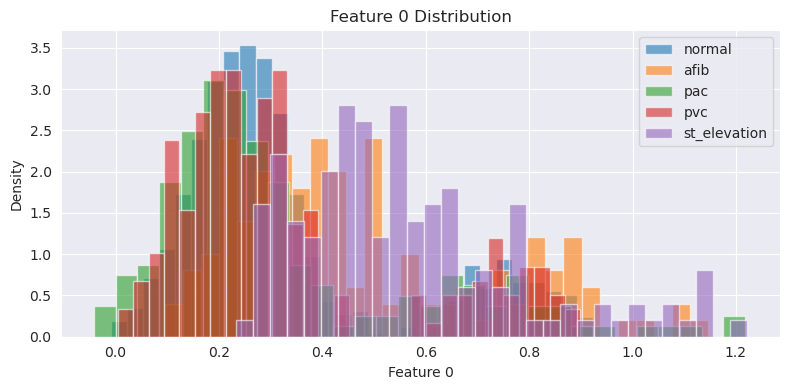

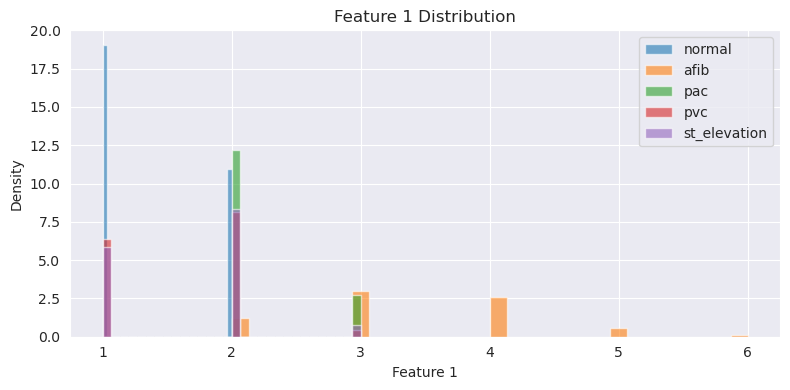

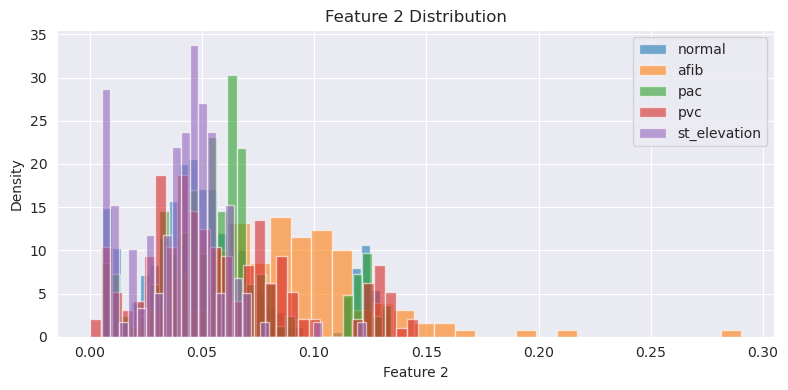

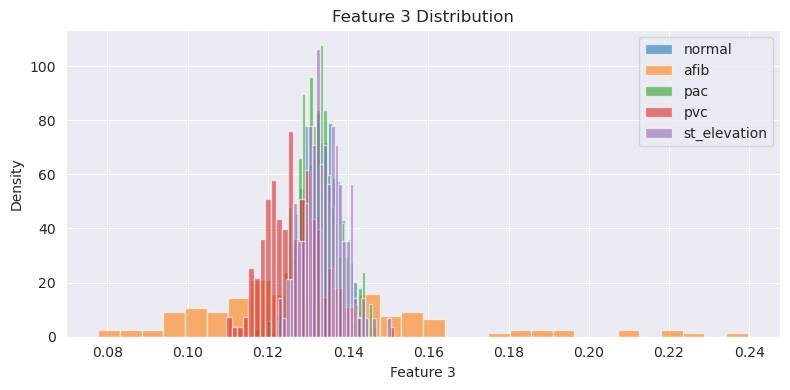

In [175]:
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    f1_score, accuracy_score
)
!pip install seabornfrom sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

if not FINAL_EVALUATION_MODE:
    exemplary_solution = ExemplarySolution.create_with_training()
    print(f"Ocena: {score_solution(exemplary_solution)} pkt")

    # Compute meta-features and predictions on validation set
    X_meta = exemplary_solution.compute_meta_features(x_valid)
    y_pred = exemplary_solution.random_forest.predict(X_meta)

    # Evaluation metrics
    print("\n=== Classification Report ===")
    print(classification_report(y_valid, y_pred, target_names=[
        "normal", "afib", "pac", "pvc", "st_elevation"
    ]))

    print("=== Confusion Matrix ===")
    cm = confusion_matrix(y_valid, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
        "normal", "afib", "pac", "pvc", "st_elevation"
    ])
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    # Plot how each feature separates the classes
plot_feature_distributions(X_meta, y_valid, class_names=[
    "normal", "afib", "pac", "pvc", "st_elevation"
])


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if not FINAL_EVALUATION_MODE:
    # Train and predict
    exemplary_solution = ExemplarySolution.create_with_training()
    print(f"\nüéØ Ocena: {score_solution(exemplary_solution):.4f} pkt")

    X_meta = exemplary_solution.compute_meta_features(x_valid)
    y_pred = exemplary_solution.random_forest.predict(X_meta)

    class_labels = ["normal", "afib", "pac", "pvc", "st_elevation"]

    # === üìä Classification Report ===
    print("\n=== üìä Classification Report ===")
    report = classification_report(y_valid, y_pred, target_names=class_labels)
    print(report)

    # === üîÄ Confusion Matrix (Absolute + Normalized) ===
    cm = confusion_matrix(y_valid, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title("Confusion Matrix (Counts)")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title("Confusion Matrix (Normalized)")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.tight_layout()
    plt.show()

    # === üß™ Per-class Accuracy & F1 ===
    print("\n=== üßÆ Per-Class Accuracy and F1 Score ===")
    for idx, label in enumerate(class_labels):
        true = y_valid == idx
        pred = y_pred == idx
        acc = accuracy_score(true, pred)
        f1 = f1_score(y_valid, y_pred, labels=[idx], average="macro")
        print(f"{label:>12}: Accuracy = {acc:.2f} | F1 = {f1:.2f}")

    # Optional: Save confusion matrix to file
    # fig.savefig("confusion_matrix_normalized.png")

    # === üìà Feature Distributions ===
    plot_feature_distributions(X_meta, y_valid, class_names=class_labels)


# Twoje RozwiƒÖzanie

W tej sekcji nale≈ºy umie≈õciƒá Twoje rozwiƒÖzanie. Wprowadzaj zmiany wy≈ÇƒÖcznie tutaj! XD

In [176]:
import numpy as np
from scipy.stats import skew, kurtosis

class YourSolution(ISolution):
    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Wyznacza 4 cechy fizjologicznie zwiƒÖzane z EKG:
        - Szczytowe wychylenie (max)
        - G≈Çƒôboko≈õƒá najni≈ºszego punktu (min)
        - Rozstƒôp (peak-to-peak)
        - Odchylenie standardowe (zmienno≈õƒá sygna≈Çu)
        """
        max_vals = np.max(x, axis=1)
        min_vals = np.min(x, axis=1)
        ptp_vals = np.ptp(x, axis=1)
        std_vals = np.std(x, axis=1)
        
        return np.column_stack((max_vals, min_vals, ptp_vals, std_vals))

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        """
        Zgodne z ograniczeniami: maks. 10 drzew i g≈Çƒôboko≈õƒá maks. 10.
        """
        return {
            "n_estimators": 10,
            "max_depth": 10,
            "min_samples_split": 2,
            "min_samples_leaf": 1,
            "max_features": "sqrt",
            "bootstrap": True
        }


# Ewaluacja

Uruchomienie poni≈ºszej kom√≥rki pozwoli sprawdziƒá, ile punkt√≥w zdoby≈Çoby Twoje rozwiƒÖzanie na danych walidacyjnych. Przed wys≈Çaniem upewnij siƒô, ≈ºe ca≈Çy notebook wykonuje siƒô od poczƒÖtku do ko≈Ñca bez b≈Çƒôd√≥w i bez konieczno≈õci ingerencji u≈ºytkownika po wybraniu opcji "Run All".

Podczas sprawdzania model zostanie zapisany jako `your_model.pkl` i oceniony na zbiorze testowym.

In [177]:
######################### NIE ZMIENIAJ TEJ KOM√ìRKI PODCZAS WYSY≈ÅANIA ##########################
if FINAL_EVALUATION_MODE:
    your_solution = YourSolution.create_with_training()
    print(f"Ocena: {score_solution(your_solution)} pkt")

    OUTPUT_PATH = "file_output"
    FUNCTION_FILENAME = "your_solution"
    FUNCTION_OUTPUT_PATH = os.path.join(OUTPUT_PATH, FUNCTION_FILENAME)

    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)
    
    with open("file_output/your_model.pkl", "wb") as model_out:
        cloudpickle.dump(your_solution, model_out)